In [1]:
!pip install summa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for summa: filename=summa-1.2.0-py3-none-any.whl size=54387 sha256=3f0ae52261d2fe2ee56f2121785d7e0c2dfa7d34a0fd326baa8025477219ed47
  Stored in directory: /root/.cache/pip/wheels/10/2d/7a/abce87c4ea233f8dcca0d99b740ac0257eced1f99a124a0e1f
Successfully built summa


In [2]:
from importlib.metadata import version
import nltk
import tensorflow
import summa
import pandas as pd

import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

In [3]:
data.sample(10)

,headlines,text
7202,Mamata is known for killing democracy: Union M...,Slamming West Bengal CM Mamata Banerjee after ...
56935,Flight from Mumbai diverted to Azerbaijan over...,A British Airways Mumbai-London flight was div...
97002,"Will support any move to bar unruly fliers, sa...",Budget carrier IndiGo on Friday said it will s...
1954,Technically Virat Kohli's balance is unbelieva...,Australia head coach Justin Langer praised Tea...
88273,Hrithik buys a house for his ex-wife Sussanne:...,"According to reports, actor Hrithik Roshan has..."
55989,Toyota to make 10 battery electric car models ...,Automaker Toyota will make more than 10 batter...
34504,Trump lied about wealth to feature on Forbes l...,US President Donald Trump lied about his wealt...
19069,Best PR in a while: Musk on being called 'man-...,Responding to former White House chief strateg...
3140,"Messi, Suarez score in Barcelona's 2-1 win ove...",Lionel Messi and Luis Suarez were on the score...
81601,Pakistan conducts fifth-most executions in wor...,Pakistan has executed as many as 465 prisoners...


In [4]:
print('전체 샘플수:',len(data))

전체 샘플수: 98401


In [5]:
data = data[['text', 'headlines']]
data.head()

,text,headlines
0,"Saurav Kant, an alumnus of upGrad and IIIT-B's...",upGrad learner switches to career in ML & Al w...
1,Kunal Shah's credit card bill payment platform...,Delhi techie wins free food from Swiggy for on...
2,New Zealand defeated India by 8 wickets in the...,New Zealand end Rohit Sharma-led India's 12-ma...
3,"With Aegon Life iTerm Insurance plan, customer...",Aegon life iTerm insurance plan helps customer...
4,Speaking about the sexual harassment allegatio...,"Have known Hirani for yrs, what if MeToo claim..."


In [6]:
data.isnull().sum()

,0
text,0
headlines,0


In [7]:
import re

In [8]:
print('헤드라인중복배제:',data['headlines'].nunique())

헤드라인중복배제: 98280


In [9]:
print('텍스트중복배제:',data['text'].nunique())

텍스트중복배제: 98360


In [10]:
#정규화 사전 숫자
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ", len(contractions))

정규화 사전의 수:  120


In [11]:
# 데이터 전처리 함수
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","", sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah

    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # 불용어 미제거 (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens
print('=3')

=3


In [12]:
df = pd.DataFrame(data)

In [13]:
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
clean_text = []

for text in data['text']:
    clean_text.append(preprocess_sentence(text, remove_stopwords=True))

print("Text 전처리 후 결과:", clean_text[:5])

Text 전처리 후 결과: ['saurav kant alumnus upgrad iiit pg program machine learning artificial intelligence sr systems engineer infosys almost years work experience program upgrad degree career support helped transition data scientist tech mahindra salary hike upgrad online power learning powered lakh careers', 'kunal shah credit card bill payment platform cred gave users chance win free food swiggy one year pranav kaushik delhi techie bagged reward spending cred coins users get one cred coin per rupee bill paid used avail rewards brands like ixigo bookmyshow ubereats cult fit', 'new zealand defeated india wickets fourth odi hamilton thursday win first match five match odi series india lost international match rohit sharma captaincy consecutive victories dating back march match witnessed india getting seventh lowest total odi cricket history', 'aegon life iterm insurance plan customers enjoy tax benefits premiums paid save taxes plan provides life cover age years also customers options insure

In [15]:
clean_headlines = []

for headline in data['headlines']:
    clean_headlines.append(preprocess_sentence(headline, remove_stopwords=False))

print("Headlines 전처리 후 결과:", clean_headlines[:5])

<ipython-input-11-8985a2a10398>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거


Headlines 전처리 후 결과: ['upgrad learner switches to career in ml al with salary hike', 'delhi techie wins free food from swiggy for one year on cred', 'new zealand end rohit sharma led india match winning streak', 'aegon life iterm insurance plan helps customers save tax', 'have known hirani for yrs what if metoo claims are not true sonam']


In [16]:
import numpy as np
data['text'] = clean_text
data['headlines'] = clean_headlines

# 빈 값을 Null 값으로 변환
data.replace('', np.nan, inplace=True)
print('=3')

=3


In [17]:
data.isnull().sum()

,0
text,0
headlines,0


텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 60
텍스트의 평균 길이 : 35.09983638377659
요약의 최소 길이 : 1
요약의 최대 길이 : 16
요약의 평균 길이 : 9.299651426306644


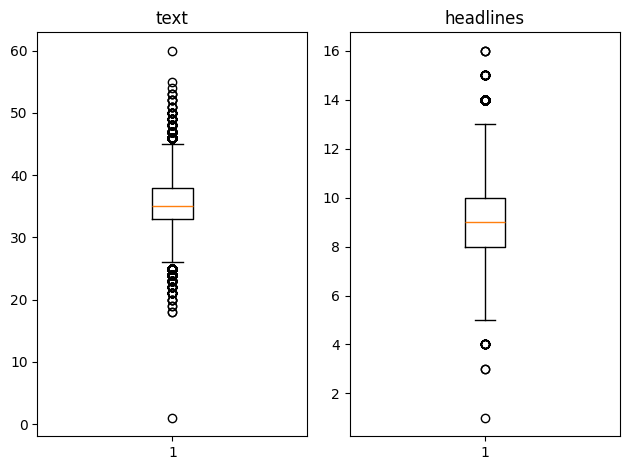

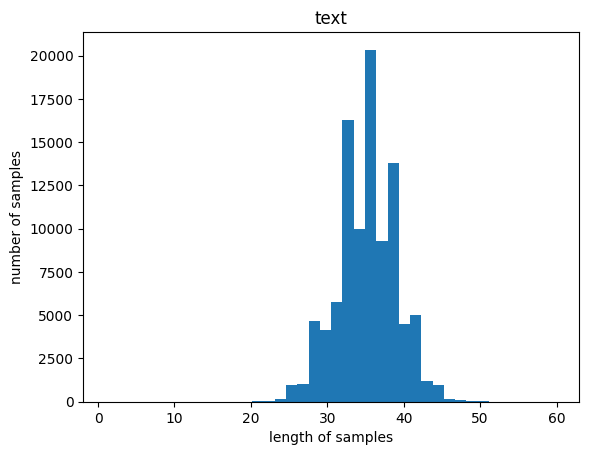

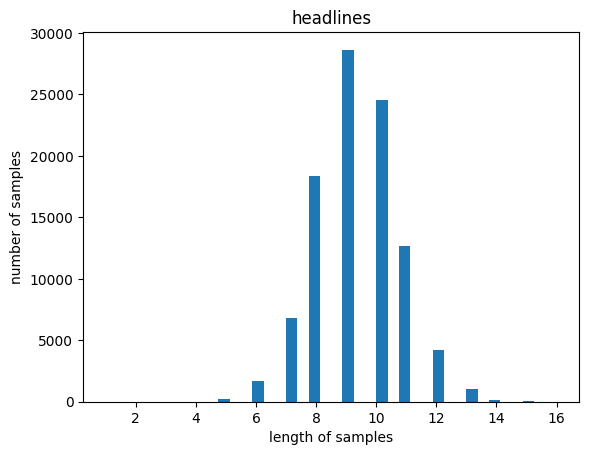

In [18]:
# 길이 분포 출력
import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in data['text']]
headlines_len = [len(s.split()) for s in data['headlines']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(headlines_len)))
print('요약의 최대 길이 : {}'.format(np.max(headlines_len)))
print('요약의 평균 길이 : {}'.format(np.mean(headlines_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('text')
plt.subplot(1,2,2)
plt.boxplot(headlines_len)
plt.title('headlines')
plt.tight_layout()
plt.show()

plt.title('text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('headlines')
plt.hist(headlines_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [19]:
#텍스트는 대부분 30~45 분포하고 45이상은 이상치가 많음
#헤드라인은 대부분 8~10에 분포 하고 12이상은 이상치가 많음

text_max_len = 45
headlines_max_len = 12
print('=3')

=3


In [20]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))
print('=3')

=3


In [21]:
data = data[data['text'].apply(lambda x: len(x.split()) <= text_max_len)]
data = data[data['headlines'].apply(lambda x: len(x.split()) <= headlines_max_len)]


print('전체 샘플수 :', (len(data)))

전체 샘플수 : 96912


In [22]:
data['decoder_input'] = data['headlines'].apply(lambda x : 'sostoken '+ x)
data['decoder_target'] = data['headlines'].apply(lambda x : x + ' eostoken')
data.head()

<ipython-input-22-aee9c2be174e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['decoder_input'] = data['headlines'].apply(lambda x : 'sostoken '+ x)
<ipython-input-22-aee9c2be174e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['decoder_target'] = data['headlines'].apply(lambda x : x + ' eostoken')


,text,headlines,decoder_input,decoder_target
0,saurav kant alumnus upgrad iiit pg program mac...,upgrad learner switches to career in ml al wit...,sostoken upgrad learner switches to career in ...,upgrad learner switches to career in ml al wit...
1,kunal shah credit card bill payment platform c...,delhi techie wins free food from swiggy for on...,sostoken delhi techie wins free food from swig...,delhi techie wins free food from swiggy for on...
2,new zealand defeated india wickets fourth odi ...,new zealand end rohit sharma led india match w...,sostoken new zealand end rohit sharma led indi...,new zealand end rohit sharma led india match w...
3,aegon life iterm insurance plan customers enjo...,aegon life iterm insurance plan helps customer...,sostoken aegon life iterm insurance plan helps...,aegon life iterm insurance plan helps customer...
5,pakistani singer rahat fateh ali khan denied r...,rahat fateh ali khan denies getting notice for...,sostoken rahat fateh ali khan denies getting n...,rahat fateh ali khan denies getting notice for...


In [23]:
encoder_input = np.array(data['text']) # 인코더의 입력
decoder_input = np.array(data['decoder_input']) # 디코더의 입력
decoder_target = np.array(data['decoder_target']) # 디코더의 레이블
print('=3')

=3


In [24]:
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[45506 65032 37608 ... 63238 83844 32968]


In [25]:
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]
print('=3')

=3


In [26]:
n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :', n_of_val)

테스트 데이터의 수 : 19382


In [27]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

훈련 데이터의 개수 : 77530
훈련 레이블의 개수 : 77530
테스트 데이터의 개수 : 19382
테스트 레이블의 개수 : 19382


In [28]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
src_tokenizer = Tokenizer() # 토크나이저 정의
src_tokenizer.fit_on_texts(encoder_input_train) # 입력된 데이터로부터 단어 집합 생성
print('=3')

=3


In [29]:
threshold = 7
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 69102
등장 빈도가 6번 이하인 희귀 단어의 수: 47112
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 21990
단어 집합에서 희귀 단어의 비율: 68.17747677346532
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.520832237506377


희귀 단어의 수가 70프로 가까이되며 등장비율이 3.5프로로 매우 적음 3장과 비슷한 비율로 이하의 수를 제거하는 방향으로 해봐도 좋을 것 같음


In [30]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train)
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

# 잘 진행되었는지 샘플 출력
print(encoder_input_train[:3])

[[1143, 955, 567, 1572, 1493, 759, 423, 121, 6924, 5117, 1, 1299, 2028, 4530, 2229, 2202, 405, 6136, 1182, 3806, 5117, 33, 1, 2021, 6925, 229, 133, 567, 1736, 141, 1493, 759, 7015, 221, 1210, 20539, 608], [6567, 275, 1445, 34629, 58, 94, 286, 50, 438, 375, 120, 275, 790, 2879, 26202, 900, 729, 438, 375, 2046, 1043, 747, 1223, 5393, 103, 70, 6, 820, 2161, 1908, 250, 522, 34629, 213, 17324, 2868], [7282, 11, 553, 6067, 1745, 774, 6744, 8, 914, 649, 1631, 1749, 138, 481, 2022, 1631, 461, 447, 10146, 553, 14, 3265, 2349, 1, 6837, 1257, 553, 9920, 6067, 290, 18, 390, 106]]


In [31]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)
print('=3')

=3


In [32]:
threshold = 6
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 30003
등장 빈도가 5번 이하인 희귀 단어의 수: 19661
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 10342
단어 집합에서 희귀 단어의 비율: 65.53011365530114
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.728033367546137


In [33]:
tar_vocab = 2000
tar_tokenizer = Tokenizer(num_words=tar_vocab)
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train)
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

# 잘 변환되었는지 확인
print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

input
input  [[1, 883, 187, 69, 7, 276, 1241, 466], [1, 263, 1008, 152, 146, 12, 188, 1411], [1, 267, 1601, 536, 7, 745], [1, 1693, 1694, 1324, 180, 16, 177], [1, 926, 59, 1202]]
target
decoder  [[883, 187, 69, 7, 276, 1241, 466, 2], [263, 1008, 152, 146, 12, 188, 1411, 2], [267, 1601, 536, 7, 745, 2], [1693, 1694, 1324, 180, 16, 177, 2], [926, 59, 1202, 2]]


In [34]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

삭제할 훈련 데이터의 개수 : 10
삭제할 테스트 데이터의 개수 : 2
훈련 데이터의 개수 : 77520
훈련 레이블의 개수 : 77520
테스트 데이터의 개수 : 19380
테스트 레이블의 개수 : 19380


In [35]:
encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen=headlines_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=headlines_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=headlines_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=headlines_max_len, padding='post')
print('=3')

=3


encoder_input_train max value: 69102
decoder_input_train max value: 1999
decoder_target_train max value: 1999
Epoch 1/50
606/606 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 4.2202
Epoch 1: val_loss improved from inf to 3.35235, saving model to best_model.h5


606/606 ━━━━━━━━━━━━━━━━━━━━ 104s 161ms/step - loss: 4.2195 - val_loss: 3.3523
Epoch 2/50
606/606 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - loss: 3.2080
Epoch 2: val_loss improved from 3.35235 to 2.87750, saving model to best_model.h5


606/606 ━━━━━━━━━━━━━━━━━━━━ 143s 168ms/step - loss: 3.2078 - val_loss: 2.8775
Epoch 3/50
606/606 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - loss: 2.7499
Epoch 3: val_loss improved from 2.87750 to 2.62936, saving model to best_model.h5


606/606 ━━━━━━━━━━━━━━━━━━━━ 104s 171ms/step - loss: 2.7498 - val_loss: 2.6294
Epoch 4/50
606/606 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - loss: 2.4535
Epoch 4: val_loss improved from 2.62936 to 2.47027, saving model to best_model.h5


606/606 ━━━━━━━━━━━━━━━━━━━━ 142s 171ms/step - loss: 2.4535 - val_loss: 2.4703
Epoch 5/50
606/606 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - loss: 2.2097
Epoch 5: val_loss improved from 2.47027 to 2.36853, saving model to best_model.h5


606/606 ━━━━━━━━━━━━━━━━━━━━ 107s 176ms/step - loss: 2.2097 - val_loss: 2.3685
Epoch 6/50
606/606 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - loss: 2.0086
Epoch 6: val_loss improved from 2.36853 to 2.30973, saving model to best_model.h5


606/606 ━━━━━━━━━━━━━━━━━━━━ 104s 171ms/step - loss: 2.0086 - val_loss: 2.3097
Epoch 7/50
606/606 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - loss: 1.8195
Epoch 7: val_loss improved from 2.30973 to 2.28294, saving model to best_model.h5


606/606 ━━━━━━━━━━━━━━━━━━━━ 144s 175ms/step - loss: 1.8196 - val_loss: 2.2829
Epoch 8/50
606/606 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - loss: 1.6578
Epoch 8: val_loss did not improve from 2.28294
606/606 ━━━━━━━━━━━━━━━━━━━━ 141s 175ms/step - loss: 1.6579 - val_loss: 2.2857
Epoch 9/50
606/606 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - loss: 1.5125
Epoch 9: val_loss did not improve from 2.28294
606/606 ━━━━━━━━━━━━━━━━━━━━ 142s 175ms/step - loss: 1.5125 - val_loss: 2.3063
Epoch 10/50
606/606 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - loss: 1.3801
Epoch 10: val_loss did not improve from 2.28294
606/606 ━━━━━━━━━━━━━━━━━━━━ 106s 175ms/step - loss: 1.3802 - val_loss: 2.3374
Epoch 11/50
606/606 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - loss: 1.2526
Epoch 11: val_loss did not improve from 2.28294
606/606 ━━━━━━━━━━━━━━━━━━━━ 139s 170ms/step - loss: 1.2526 - val_loss: 2.3733
Epoch 12/50
606/606 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - loss: 1.1445
Epoch 12: val_loss did not improve from 2.28294
606/606 ━━━━━━━━━━━

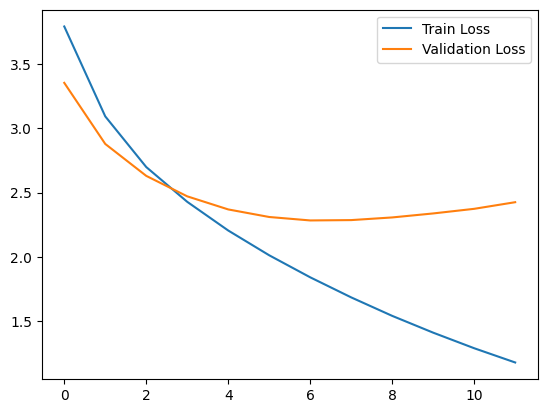

In [36]:
from keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional, Attention
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import tensorflow as tf

# 단어 집합 크기 설정
src_vocab = 8000  # 인코더 입력 데이터의 단어 집합 크기
tar_vocab = 8000  # 디코더 입력 데이터의 단어 집합 크기 (수정됨)
embedding_dim = 128  # 임베딩 차원
hidden_size = 256  # LSTM hidden state 크기

# 토크나이저 설정 (OOV 처리 추가)
from tensorflow.keras.preprocessing.text import Tokenizer
src_tokenizer = Tokenizer(num_words=src_vocab, oov_token='<UNK>')
tar_tokenizer = Tokenizer(num_words=tar_vocab, oov_token='<UNK>')

# 입력 데이터 최대값 확인
def check_max_value(data, name):
    print(f"{name} max value: {np.max(data)}")

check_max_value(encoder_input_train, "encoder_input_train")
check_max_value(decoder_input_train, "decoder_input_train")
check_max_value(decoder_target_train, "decoder_target_train")

# 데이터에서 초과한 인덱스 값 필터링
def filter_vocab_indices(data, vocab_size):
    return np.where(np.array(data) >= vocab_size, 1, data)  # 초과한 값은 1(<UNK>)로 대체

encoder_input_train = filter_vocab_indices(encoder_input_train, src_vocab)
encoder_input_test = filter_vocab_indices(encoder_input_test, src_vocab)

decoder_input_train = filter_vocab_indices(decoder_input_train, tar_vocab)
decoder_target_train = filter_vocab_indices(decoder_target_train, tar_vocab)

decoder_input_test = filter_vocab_indices(decoder_input_test, tar_vocab)
decoder_target_test = filter_vocab_indices(decoder_target_test, tar_vocab)

# 인코더 모델
encoder_inputs = Input(shape=(text_max_len,))
enc_emb = Embedding(src_vocab, embedding_dim, trainable=True)(encoder_inputs)

# Bidirectional LSTM 사용
encoder_lstm = Bidirectional(LSTM(hidden_size, return_sequences=True, return_state=True))
encoder_output, forward_h, forward_c, backward_h, backward_c = encoder_lstm(enc_emb)

# 두 개의 방향을 연결
state_h = Concatenate()([forward_h, backward_h])
state_c = Concatenate()([forward_c, backward_c])

encoder_states = [state_h, state_c]

# 디코더 모델
decoder_inputs = Input(shape=(headlines_max_len,))
dec_emb_layer = Embedding(tar_vocab, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(hidden_size * 2, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=encoder_states)

# 어텐션 메커니즘 추가
attention = Attention()
attention_output = attention([decoder_outputs, encoder_output])
decoder_combined_context = Concatenate(axis=-1)([decoder_outputs, attention_output])

decoder_dense = Dense(tar_vocab, activation='softmax')
decoder_outputs = decoder_dense(decoder_combined_context)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

# 체크포인트 설정
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# 모델 학습
history = model.fit(
    [encoder_input_train, decoder_input_train],
    np.expand_dims(decoder_target_train, -1),
    validation_data=([encoder_input_test, decoder_input_test], np.expand_dims(decoder_target_test, -1)),
    batch_size=128,
    epochs=50,
    callbacks=[checkpoint, early_stopping]
)

# 학습 과정 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [61]:
# Summa를 이용한 추출적 요약
from summa.summarizer import summarize

def extractive_summary(text):
    return summarize(text, ratio=0.5)

# 테스트
sample_text = data['text'].iloc[0]
print("원문:", sample_text)
print("추출적 요약:", extractive_summary(sample_text))


원문: saurav kant alumnus upgrad iiit pg program machine learning artificial intelligence sr systems engineer infosys almost years work experience program upgrad degree career support helped transition data scientist tech mahindra salary hike upgrad online power learning powered lakh careers
추출적 요약: 


In [55]:
def generate_summary(input_text):
    # 🚨 사전에 없는 단어는 <UNK>로 처리
    input_seq = src_tokenizer.texts_to_sequences([input_text])

    # 🔍 변환된 시퀀스 확인
    print("🔍 변환된 입력 시퀀스 (before filtering):", input_seq)

    # 🚨 빈 리스트 예외 처리
    if not input_seq or input_seq[0] is None or len(input_seq[0]) == 0:
        print("⚠️ 입력 문장이 OOV 단어로만 구성되어 있음. 기본 요약 반환.")
        return "No summary available."

    # 🚨 None 값을 0으로 변환 (즉, OOV 단어를 <UNK>로 대체)
    input_seq = [[word if word is not None else src_tokenizer.word_index.get('<UNK>', 0) for word in seq] for seq in input_seq]

    # 🚨 변환된 시퀀스 확인 (수정 후)
    print("🔍 변환된 입력 시퀀스 (after filtering):", input_seq)

    input_seq = tf.keras.preprocessing.sequence.pad_sequences(input_seq, maxlen=text_max_len, padding='post')

    # 🚨 패딩된 입력값 확인
    print("🔍 패딩된 입력 시퀀스:", input_seq)

    prediction = model.predict([input_seq, np.zeros((1, headlines_max_len))])
    predicted_indices = np.argmax(prediction[0], axis=-1)

    # 🚨 예측된 단어 인덱스 확인
    print("🔍 예측된 단어 인덱스:", predicted_indices)

    summary = ' '.join([tar_tokenizer.index_word.get(idx, '') for idx in predicted_indices if idx > 0])
    return summary.strip()


In [57]:
sample_text = data['text'].iloc[5]
print("원문:", sample_text)
print("추출적 요약:", extractive_summary(sample_text))
print("추상적 요약:", generate_summary(sample_text))


원문: india recorded lowest odi total new zealand getting runs overs fourth odi hamilton thursday seven india batsmen dismissed single digit scores number ten batsman yuzvendra chahal top scored india previous lowest odi total new zealand
추출적 요약: 
🔍 변환된 입력 시퀀스 (before filtering): [[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]]
🔍 변환된 입력 시퀀스 (after filtering): [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
🔍 패딩된 입력 시퀀스: [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
🔍 예측된 단어 인덱스: [0 0 0 0 0 0 0 0 0 0 0 0]
추상적 요약: 


In [106]:
print("🔍 <UNK> 토큰 인덱스:", src_tokenizer.word_index.get('<UNK>'))


🔍 <UNK> 토큰 인덱스: 1


🔍 <UNK> 토큰 인덱스: 1
Epoch 1/50
606/606 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - loss: 4.2113
Epoch 1: val_loss improved from inf to 3.32418, saving model to best_model.h5


606/606 ━━━━━━━━━━━━━━━━━━━━ 106s 170ms/step - loss: 4.2106 - val_loss: 3.3242
Epoch 2/50
606/606 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - loss: 3.1664
Epoch 2: val_loss improved from 3.32418 to 2.84713, saving model to best_model.h5


606/606 ━━━━━━━━━━━━━━━━━━━━ 145s 175ms/step - loss: 3.1662 - val_loss: 2.8471
Epoch 3/50
606/606 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - loss: 2.7157
Epoch 3: val_loss improved from 2.84713 to 2.59701, saving model to best_model.h5


606/606 ━━━━━━━━━━━━━━━━━━━━ 142s 176ms/step - loss: 2.7156 - val_loss: 2.5970
Epoch 4/50
606/606 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - loss: 2.4055
Epoch 4: val_loss improved from 2.59701 to 2.44447, saving model to best_model.h5


606/606 ━━━━━━━━━━━━━━━━━━━━ 107s 176ms/step - loss: 2.4055 - val_loss: 2.4445
Epoch 5/50
606/606 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - loss: 2.1735
Epoch 5: val_loss improved from 2.44447 to 2.34855, saving model to best_model.h5


606/606 ━━━━━━━━━━━━━━━━━━━━ 139s 171ms/step - loss: 2.1735 - val_loss: 2.3485
Epoch 6/50
606/606 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - loss: 1.9826
Epoch 6: val_loss improved from 2.34855 to 2.29552, saving model to best_model.h5


606/606 ━━━━━━━━━━━━━━━━━━━━ 107s 176ms/step - loss: 1.9826 - val_loss: 2.2955
Epoch 7/50
606/606 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - loss: 1.8105
Epoch 7: val_loss improved from 2.29552 to 2.27016, saving model to best_model.h5


606/606 ━━━━━━━━━━━━━━━━━━━━ 142s 175ms/step - loss: 1.8105 - val_loss: 2.2702
Epoch 8/50
606/606 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - loss: 1.6559
Epoch 8: val_loss did not improve from 2.27016
606/606 ━━━━━━━━━━━━━━━━━━━━ 139s 170ms/step - loss: 1.6559 - val_loss: 2.2749
Epoch 9/50
606/606 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - loss: 1.5098
Epoch 9: val_loss did not improve from 2.27016
606/606 ━━━━━━━━━━━━━━━━━━━━ 106s 175ms/step - loss: 1.5098 - val_loss: 2.2902
Epoch 10/50
606/606 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - loss: 1.3785
Epoch 10: val_loss did not improve from 2.27016
606/606 ━━━━━━━━━━━━━━━━━━━━ 139s 170ms/step - loss: 1.3785 - val_loss: 2.3197
Epoch 11/50
606/606 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - loss: 1.2569
Epoch 11: val_loss did not improve from 2.27016
606/606 ━━━━━━━━━━━━━━━━━━━━ 145s 175ms/step - loss: 1.2570 - val_loss: 2.3608
Epoch 12/50
606/606 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - loss: 1.1474
Epoch 12: val_loss did not improve from 2.27016
606/606 ━━━━━━━━━━━

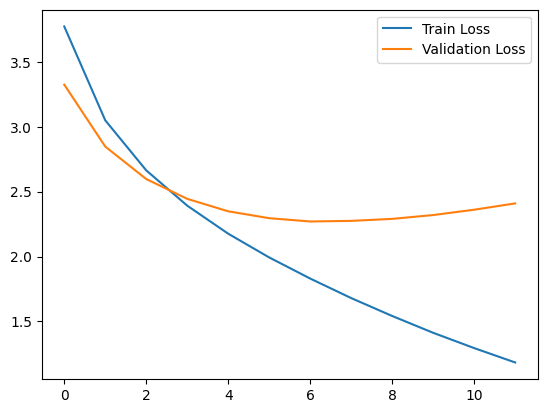

In [62]:

# 단어 집합 크기 설정
src_vocab = 8000  # 인코더 입력 데이터의 단어 집합 크기
tar_vocab = 8000  # 디코더 입력 데이터의 단어 집합 크기
embedding_dim = 128  # 임베딩 차원
hidden_size = 256  # LSTM hidden state 크기

# ✅ 1. 토크나이저 학습 순서 조정 (먼저 단어 사전 학습)
from tensorflow.keras.preprocessing.text import Tokenizer
src_tokenizer = Tokenizer(num_words=src_vocab, oov_token='<UNK>')
tar_tokenizer = Tokenizer(num_words=tar_vocab, oov_token='<UNK>')

# 🔥 반드시 토크나이저를 먼저 학습
src_tokenizer.fit_on_texts(data['text'])
tar_tokenizer.fit_on_texts(data['headlines'])

# ✅ 2. <UNK> 토큰 정상 등록 여부 확인
print("🔍 <UNK> 토큰 인덱스:", src_tokenizer.word_index.get('<UNK>'))

# ✅ 3. 데이터에서 초과한 인덱스 값 필터링
def filter_vocab_indices(data, vocab_size):
    return np.where(np.array(data) >= vocab_size, src_tokenizer.word_index.get('<UNK>', 1), data)  # 초과한 값은 <UNK>로 대체

encoder_input_train = filter_vocab_indices(encoder_input_train, src_vocab)
encoder_input_test = filter_vocab_indices(encoder_input_test, src_vocab)

decoder_input_train = filter_vocab_indices(decoder_input_train, tar_vocab)
decoder_target_train = filter_vocab_indices(decoder_target_train, tar_vocab)

decoder_input_test = filter_vocab_indices(decoder_input_test, tar_vocab)
decoder_target_test = filter_vocab_indices(decoder_target_test, tar_vocab)

# ✅ 4. 인코더 모델 정의
encoder_inputs = Input(shape=(text_max_len,))
enc_emb = Embedding(src_vocab, embedding_dim, trainable=True)(encoder_inputs)

# Bidirectional LSTM 사용
encoder_lstm = Bidirectional(LSTM(hidden_size, return_sequences=True, return_state=True))
encoder_output, forward_h, forward_c, backward_h, backward_c = encoder_lstm(enc_emb)

# 두 개의 방향을 연결
state_h = Concatenate()([forward_h, backward_h])
state_c = Concatenate()([forward_c, backward_c])

encoder_states = [state_h, state_c]

# ✅ 5. 디코더 모델 정의
decoder_inputs = Input(shape=(headlines_max_len,))
dec_emb_layer = Embedding(tar_vocab, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(hidden_size * 2, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=encoder_states)

# 어텐션 메커니즘 추가
attention = Attention()
attention_output = attention([decoder_outputs, encoder_output])
decoder_combined_context = Concatenate(axis=-1)([decoder_outputs, attention_output])

decoder_dense = Dense(tar_vocab, activation='softmax')
decoder_outputs = decoder_dense(decoder_combined_context)

# ✅ 6. 모델 정의 및 컴파일
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

# ✅ 7. 체크포인트 설정 및 모델 학습
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

history = model.fit(
    [encoder_input_train, decoder_input_train],
    np.expand_dims(decoder_target_train, -1),
    validation_data=([encoder_input_test, decoder_input_test], np.expand_dims(decoder_target_test, -1)),
    batch_size=128,
    epochs=50,
    callbacks=[checkpoint, early_stopping]
)

# ✅ 8. 학습 과정 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [108]:
def generate_summary(input_text):
    # 🚨 입력 문장을 토큰화하여 정수 시퀀스로 변환
    input_seq = src_tokenizer.texts_to_sequences([input_text])
    input_seq = tf.keras.preprocessing.sequence.pad_sequences(input_seq, maxlen=text_max_len, padding='post')

    # ✅ 디코더 입력을 <sostoken>으로 시작
    sostoken_index = tar_tokenizer.word_index.get('sostoken', 1)  # 기본값 1
    eostoken_index = tar_tokenizer.word_index.get('eostoken', 2)  # 기본값 2

    decoder_input_seq = np.zeros((1, headlines_max_len))
    decoder_input_seq[0, 0] = sostoken_index  # 첫 단어를 <sostoken>으로 설정

    summary_indices = []

    for i in range(1, headlines_max_len):  # 최대 길이까지 반복 예측
        prediction = model.predict([input_seq, decoder_input_seq])
        predicted_index = np.argmax(prediction[0, i - 1])  # i번째 단어 예측

        if predicted_index == eostoken_index or predicted_index == 0:  # 종료 조건
            break

        summary_indices.append(predicted_index)
        decoder_input_seq[0, i] = predicted_index  # 다음 단어를 디코더 입력에 추가

    # ✅ 예측된 단어 확인 (디버깅)
    print("🔍 예측된 단어 인덱스:", summary_indices)

    # ✅ 단어 인덱스를 실제 단어로 변환
    summary = ' '.join([tar_tokenizer.index_word.get(idx, '') for idx in summary_indices if idx > 0])

    return summary.strip()


In [118]:
import nltk

# Download 'punkt_tab' data package
nltk.download('punkt_tab', download_dir='/usr/local/nltk_data')

[nltk_data] Downloading package punkt_tab to /usr/local/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [119]:
sample_text = data['text'].iloc[10]
print("원문:", sample_text)
print("추출적 요약:", extractive_summary(sample_text))
print("추상적 요약:", generate_summary(sample_text))


원문: isha ghosh year old member bharat scouts guides imparting physical mental training schoolchildren jharkhand several decades chaibasa based ghosh reportedly walks seven kilometres daily spends eight hours conducting physical training apart climbing yoga sessions says one something society till one last breath
⚠️ Summa가 실패하여 NLTK 방식으로 요약을 시도합니다.
추출적 요약: isha ghosh year old member bharat scouts guides imparting physical mental training schoolchildren jharkhand several decades chaibasa based ghosh reportedly walks seven kilometres daily spends eight hours conducting physical training apart climbing yoga sessions says one something society till one last breath
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
🔍 예측된 단어 인덱스: [1719, 1489, 33, 3]
추상적 요약: pant soon report in


In [128]:
from summa.summarizer import summarize
def extractive_summary(text, ratio=0.3):
    """
    Summa를 이용한 추출적 요약 함수.

    Args:
        text (str): 원본 텍스트
        ratio (float): 요약 비율 (기본값 30%)

    Returns:
        str: 요약된 텍스트
    """
    # 텍스트가 너무 짧은 경우 원문 반환
    if len(text.split()) < 1:
        print("⚠️ 입력 문장이 너무 짧아 요약이 어렵습니다.")
        return text

    # Summa를 이용한 추출적 요약 실행
    summary = summarize(text, ratio=ratio, language='english')

    # Summa가 빈 문자열을 반환하는 경우 원문 반환
    if not summary.strip():
        print("⚠️ Summa가 요약을 생성하지 못했습니다. 원문을 반환합니다.")
        return text

    return summary


In [129]:
# ✅ 기존 데이터에서 10번째 샘플을 가져와 요약 수행
sample_text = data['text'].iloc[40]

# ✅ 원문 출력
print("원문:", sample_text)

# ✅ Summa 요약 실행
print("추출적 요약:", extractive_summary(sample_text, ratio=0.3))


원문: samsung started mass producing one terabyte embedded universal flash storage technology use next generation mobile applications claims industry first eufs company added new eufs let smartphones store minute videos shot uhd format sized previous gb version samsung said
⚠️ Summa가 요약을 생성하지 못했습니다. 원문을 반환합니다.
추출적 요약: samsung started mass producing one terabyte embedded universal flash storage technology use next generation mobile applications claims industry first eufs company added new eufs let smartphones store minute videos shot uhd format sized previous gb version samsung said


In [130]:
def extractive_summary(text, ratio=0.5):
    if len(text.split()) < 50:
        print("⚠️ 입력 문장이 너무 짧아 요약이 어렵습니다. 비율을 높여 시도합니다.")
        return summarize(text, ratio=0.9, language='english')  # 최대한 요약을 생성하도록 유도

    summary = summarize(text, ratio=ratio, language='english')

    if not summary.strip():
        print("⚠️ Summa가 요약을 생성하지 못했습니다. 원문을 반환합니다.")
        return text

    return summary


In [133]:
data2 = data[['text']]

In [136]:
# ✅ 기존 데이터에서 10번째 샘플을 가져와 요약 수행
sample_text = data2['text'].iloc[300]

# ✅ 원문 출력
print("원문:", sample_text)

# ✅ Summa 요약 실행
print("추출적 요약:", extractive_summary(sample_text, ratio=0.3))


원문: least five maoists killed one suffered injuries encounter security forces jharkhand west singhbhum district tuesday commando battalion resolute action jharkhand police launched special operation target naxals area police said security personnel involved operation reported injured far
⚠️ 입력 문장이 너무 짧아 요약이 어렵습니다. 비율을 높여 시도합니다.
추출적 요약: 


앞에서 했던 cv의 경우 분류문제를 보통 담당하게 되고 사진마다 라벨링이 존재해서 정확히 틀렸는지 맞앗는지를 정확히 알수 있게됨 하지만 시퀀스모델에서 문장 생성 방식에서는 이런 타겟과 어느정도까지 동일한지를 맞추기 때문에 한단어가 틀린정도가 매우심하여도 로스율이 생각보다 낮아 보이지 않을 수 있다는 것을 알게되었습니다. 특히 전체적인 흐름에서 한단어로 크게 바뀌거나 문장의 의미를 잃는 경우가 상당히 많 기 때문에 완성도가 아주 높지 않고서는 실질적으로 서비스 하는 부분에서도 에러가 상당히 많을 수 있는 것을 알게 되었습니다.
 summa의 경우는 예제 텍스트가 길지 않을 경우에는 제대로 된 요약정보를 뽑기 어려울 수 있는 것도 추가적으로 알게되었습니다. 전처리 이후 데이터를 다루는게 아니라 원문을 사용함에도 제대로 출력되지 않는 것으로보아 훨신더 긴 글혹은 짧은 글의경우에는 직접적으로 보고 요약 문장을 빼는게 더 좋을 수 이 있을 것 같습니다.